## **Abstract**

This report presents a thorough examination of transit data in London during May, June, and July 2022. Leveraging extensive datasets sourced from public transportation authorities and supplementary sources, the analysis delves into key aspects of London's transit system, shedding light on patterns, trends, and noteworthy events during the specified timeframe. The data used includes the amount of transit by time, holidays and major events in London, and geographic mapping.

The report commences with a contextual overview of London's public transportation infrastructure, outlining the important modes of transit, key routes, weather, and time of transit. A detailed examination of ridership statistics provides insights into peak travel times, popular routes, and potential factors affecting them.
Furthermore, the report explores the impact of external factors on transit patterns, such as major events, weather conditions, and public holidays. The report shows genuine relationships with causes and effects by correlating these external variables.

The key findings are as follows: first, Londoners are 1.3 times more likely to travel in dry weather than wet; the amount of transit peaks in the morning, midday, and early evening; walking is the most common form of transit, transit is equal in opposite directions, transit is strongly, inversely correlated to holidays/major events, and finally the most common areas for transit were popular roads and bridges.


## **Introduction**

London's transit system is among the best in the world. It is expansive, efficient, and well-organized. This report will aim to unpack some of the intricacies related to overground services like walking paths, bike rentals, and e-scooters.

**Background information**

London's urban mobility is shaped by historic walking paths, including those in Hyde Park and along the Thames. Santander Cycles, known as "Boris Bikes," pioneered bike rentals, promoting eco-friendly commuting. Electric scooter rentals have surged, providing an agile option for short distances. Rooted in history, these initiatives reflect London's commitment to diverse, sustainable transportation solutions.

**Objective**

This report will show interesting trends across weather, routes, timing, and direction of transit. Combining external data and variables will reveal correlations and ideas that are not present at first.

**Scope**

The scope of this report is limited to 3 months, May, June, and July, in 2022. The modes of transportation are walking, various forms of biking, and e-scooters. The location is limited to Central London.


## **Cleaning Data**

The first step was to import pandas for its vast functionality. Then, I downloaded all the 2022 Transit CSV data as a Pandas Dataframe.

In [ ]:
import pandas as pd

traffic_data_df = pd.read_csv('2022-Central.csv')

Next, I removed all the duplicates. I did not specify a subset, so it will only filter out entries where the entire row is identical.

In [ ]:
# Dropping Duplicates
cleaned_traffic_data_df = traffic_data_df.drop_duplicates()

After that, I removed columns that weren't necessary for analysis.
- Year will always be 2022 (by the nature of the dataset), so it is not useful.
- The Round is always 'A'; again, it is useless.



In [ ]:
# Removing unnecessary columns
columns_to_remove = ['Year', 'Round']
cleaned_traffic_data_df = cleaned_traffic_data_df.drop(columns=columns_to_remove)

I then used the title function on all columns of type String (called 'object' in the dataframe datatype). This way, everything's capitalization is normalized and will not affect count functions for future analysis.

In [ ]:
# Standardize the capitalization of all String columns and removes whitespace
string_columns = cleaned_traffic_data_df.select_dtypes(include='object').columns
# Capitalizes every word in string columns
cleaned_traffic_data_df[string_columns] = cleaned_traffic_data_df[string_columns].apply(lambda x: x.str.title())

Next, I applied the strip function to all String columns so there is no leading or trailing whitespace. This, again, will prevent any errors in counting.

In [ ]:
string_columns.to_list()
for column in string_columns:
  # Removes unnecessary whitespace in all string columns
  cleaned_traffic_data_df[column] = cleaned_traffic_data_df[column].astype('str') # Error catching for non-strings
  cleaned_traffic_data_df[column] = cleaned_traffic_data_df[column].apply(lambda x: x.strip())

Finally, I renamed a couple of columns that could be confusing. I renamed "Day" to "Day Type" because "Day" could mean Monday, Tuesday, Wednesday, etc., whereas "Day Type" more clearly describes "Weekday" vs. "Weekend". I also renamed "Dir" to "Direction" because the word is not commonly shortened and could confuse users.

In [ ]:
# Rename the day and dir columns so there is no confusion
new_column_names = {'Day': 'Day Type', 'Dir': 'Direction'}
cleaned_traffic_data_df.rename(columns=new_column_names, inplace=True)

## **Analyzing Data**

### **Weather Analysis**

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

# Weather analysis
weather_bike_count = cleaned_traffic_data_df.groupby('Weather')['Count'].sum() # Stores the sums of wet and dry counts
weather_times_count = cleaned_traffic_data_df['Weather'].value_counts() # Stores the total number of wet and dry times there are

num_dry_times = weather_times_count[0] # Number of dry times
num_wet_times = weather_times_count[1] # Number of wet times

dry_transit = weather_bike_count[0] # Amount of transit during dry times
wet_transit = weather_bike_count[1] # Amount of transit during wet times

bike_rentals_per_dry_time = dry_transit/num_dry_times # Amount of transit PER dry time
bike_rentals_per_wet_time = wet_transit/num_wet_times # Amount of transit PER wet time

# Results
# Compares the per capita amount of transit because there are many more dry times than wet
print(f'People are {round(bike_rentals_per_dry_time/bike_rentals_per_wet_time,2)} times more likely to rent bikes in dry weather than in wet weather')


This analysis shows Londoners are about 1.3 times more likely to cargo bikes, ride scooters, ride conventional bikes, or walk while the weather is dry than wet. This disparity is for obvious reasons: discomfort of being wet, danger of slipping, etc. As a result, Londoners are more likely to either stay home or take more convenient forms of transit (I.E. buses, tubes, cars) while it is wet.

To find this conclusion, I computed the total sum of transit while it was dry and wet. I then divided that amount by the number of dry and wet times, respectively. This is necessary because the data set has far more dry times than wet times. As a result, comparing the raw amount of transit while wet versus dry would not accurately depict the behavior of Londoners. The results would be hugely skewed in "favor" of the dry times simply because it is dry far more than it is wet.


### **Time Analysis**

In [ ]:
# Time analysis
time_and_count_df = cleaned_traffic_data_df.groupby('Time')['Count'].sum().reset_index()

# Plotting the traffic by time
time_count_bar = px.bar(time_and_count_df, x='Time', y='Count', title='Amount of Transit by Time')
time_count_bar.show()

I found the distribution of transit in relation to time was multimodal with three peaks. The timing makes sense when thinking about the work day. The two most significant peaks are in the morning (at 8:45) and early evening (18:00), which correlate to commute times. The third peak is during midday (13:00), likely the lunchbreak transit rush.

### **Mode Analysis**

In [ ]:
# Type of transit analysis
mode_and_count_df = cleaned_traffic_data_df.groupby('Mode')['Count'].sum().reset_index()
mode_and_count_df = mode_and_count_df.sort_values(by=['Count'], ascending=False)

# Plotting the usage of each mode
mode_count_bar = px.bar(mode_and_count_df, x='Mode', y='Count', title='Amount of Transit by Mode')
mode_count_bar.show()

This finding shows just how much Londoners favor walking to other modes of transport measured. It is about 4.24 times more common than conventional bike rentals, the second most popular category. Reasons for this phenomenon include the safety, low cost, and simplicity of walking.

### **Direction Analysis**

In [ ]:
# Direction of transit analysis
dir_and_count_df = cleaned_traffic_data_df.groupby('Direction')['Count'].sum().reset_index()
dir_and_count_df = dir_and_count_df.sort_values(by=['Count'], ascending=False)

# Plotting the usage of each mode
dir_and_count_df = px.bar(dir_and_count_df, x='Direction', y='Count', title='Amount of Transit by Direction')
dir_and_count_df.show()

# Route of transit analysis
route_and_count_df = cleaned_traffic_data_df.groupby('Path')['Count'].sum().reset_index()
route_and_count_df = route_and_count_df.sort_values(by=['Count'], ascending=False)

# Plotting the usage of each mode
route_and_count_bar = px.bar(route_and_count_df, x='Path', y='Count', title='Amount of Transit by Route')
route_and_count_bar.show()

This report showed equality in opposite directions of travel, both generally and on specific routes. This means northbound travel was nearly equal to southbound travel, as was westbound to eastbound. This phenomenon is obvious once visualized and given to the reader, yet at first, one would likely not think about it. The reasoning is simple: most trips are round trips, not one-way. School, work, day-trips, etc. are all round trips.

### **Month Analysis**

In [ ]:
# Dataframe containing major events and holidays of May, June, July 2022
holidays_df = pd.read_csv('UK Holidays.csv')
holidays_df['Month'].value_counts().plot(kind='bar', title = "Number of Holidays/Major Events by Month")

# Month Analysis
cleaned_traffic_data_df_date = cleaned_traffic_data_df
cleaned_traffic_data_df_date['Date'] = cleaned_traffic_data_df['Date'].apply(lambda x: x[3:5])
month_and_count_df = cleaned_traffic_data_df_date.groupby('Date')['Count'].sum().reset_index()

counts = cleaned_traffic_data_df_date['Date'].value_counts() # Counts the number of times each month appears in the dataset

# Switching the count to per month
month_and_count_df['Count'][0] = month_and_count_df['Count'][0]/counts.loc['05']
month_and_count_df['Count'][1] = month_and_count_df['Count'][1]/counts.loc['06']
month_and_count_df['Count'][2] = month_and_count_df['Count'][2]/counts.loc['07']

# Plotting the transit by month and holidays by Month
month_and_count_df.plot.bar(x="Date", y="Count", title="Amount of Transit by Month");


This analysis revealed an interesting trend. I found July was the most popular transit month, followed by June, then May. At first, I theorized the drop-off was purely caused by the start of summer vacation, and travel would naturally pick up. However, upon further investigation, I also realized it was also inversely correlated with holidays and significant events (i.e., Wimbledon or The Commonwealth Games). This correlation between the number of holidays/major events and the amount of transit means the more holidays/major events there are in a month, the less transit there will be (at least for the months of May, June, and July). For this analysis, I had to divide the amount of transit by the number of times the month appeared, similar to my analysis for weather. If I had not done so, the results would be the exact opposite (May would be the largest, and July would be the smallest).

This table demonstrates the concept:


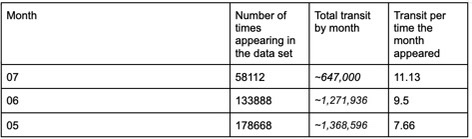

It clearly shows the skewness that would appear if I had not changed the graph to plot the transit PER month.



### **Heat Map Analysis**

In [ ]:
import folium
from folium.plugins import HeatMap

# Loading in the 2 necessary dataframes
geo_df = pd.read_csv('Count locations.csv')
unqID_and_count_df = cleaned_traffic_data_df_date.groupby('UnqID')['Count'].sum().reset_index()

# Cleaning geo_df

# Removing unnecessary columns
columns_to_remove = ['Which folder?', 'Shared sites', 'Functional area for monitoring', 'Road type', 'Is it on the strategic CIO panel?', 'Easting (UK Grid)', 'Northing (UK Grid)']
geo_df = geo_df.drop(columns=columns_to_remove)

# Standardize the capitalization of all String columns and removes whitespace
string_columns = geo_df.select_dtypes(include='object').columns
# Capitalizes every word in string columns
geo_df[string_columns] = geo_df[string_columns].apply(lambda x: x.str.title())

merged_df = pd.merge(geo_df, unqID_and_count_df, left_on="Site ID", right_on="UnqID")

# Create a Folium map centered at a specific location
map_center = [merged_df['Latitude'].mean(), merged_df['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=13)

# Create a HeatMap layer based on the data in the 'Count' column
heat_data = [[row['Latitude'], row['Longitude'], row['Count']] for index, row in merged_df.iterrows()]
HeatMap(heat_data).add_to(my_map)

# Displaying the map
my_map


This heat map clearly displays the behavior of Londoners. The most active transit areas are, expectedly, popular streets like King's Cross Road and Oxford Street and bridges like Westminster Bridge and London Bridge. These areas make sense as hot spots for transit as they are both routes common for tourists and locals.

## **Keywords**

Some keywords of this report are time, weather, and month which all play an essential role in the amount of transit at a given time.

Other keywords include pedestrian, bike, and route, all critical descriptors of a given piece of traffic.


## **Methods**

**Data**

This report required lots of data to draw useful conclusions. First, the walking, biking, and scootering transit data from Central London provided the core statistics on how many people used each mode of transportation. The holidays and major events sheet was helpful in finding correlations between monthly trends and monthly events. Lastly, the mapping data provided a way to visualize the most common areas of transit in Central London.

**Methodology**

The main methods I employed were visualization techniques. I frequently divided the data by the number of times it appeared (to get an objective number) and graphed it against a weather pattern or month. I also put graphs side by side to clearly demonstrate correlations. Lastly, I visualized data by mapping it.

**Tools**

The entire project was completed in Python 3 using libraries such as Pandas, MatPlotLib, Folium, and Plotly Express.


## **Results**

This report revealed many interesting findings about Londoners' habits regarding transit.

First, Londoners were 1.3 times more likely to travel by walking, biking, or scooting when dry than wet. This was true for various reasons relating to comfort and convenience.

The timing of transit was a 3-peak multimodal model. The peaks were, expectedly, during commute hours (early morning and evening) and during lunch around 13:00.

Also, the most popular form of transit was walking by a significant margin. Similar to the weather phenomena, the reasons relate to comfort and convenience.

The direction of transit also had an interesting result. The traffic was nearly equal in opposite directions, indicating almost every trip was a round trip.

Another finding was that transit differed significantly by month. I found this differentiation was strongly, inversely correlated to the number of holidays and major events occurring during that month. This demonstrates people tend to travel less during breaks. They likely prefer to rest at home on off days than travel. The breaks in work/school contribute largely to the downturn.

Finally, I found that the most popular areas for transit were popular streets and bridges used by both locals and tourists.


## **Conclusion**


In conclusion, this report provides a comprehensive and insightful analysis of transit data in London for the months of May, June, and July 2022. Leveraging rich datasets from various sources, the examination encompasses key facets of London's transit system, offering valuable insights into patterns, trends, and notable events.

The detailed examination of ridership statistics uncovers crucial information about peak travel times, popular routes, and potential influencing factors. The report goes beyond mere observation by delving into the impact of external variables, such as weather conditions, major events/public holidays, and specific areas establishing clear correlations and causations.

The key findings highlight important aspects of London's transit behavior, including preferences in weather conditions, peak transit times, prevalent modes of transit, and the influence of external events. These findings contribute to a deeper understanding of the intricacies of London's transit system.